<a href="https://colab.research.google.com/github/lmcanavals/ml/blob/main/1103_deeper_into_a_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [4]:
x_train, x_test = x_train / 255., x_test / 255.
y_train = keras.utils.to_categorical(y_train, 10)
y_test =  keras.utils.to_categorical(y_test, 10)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


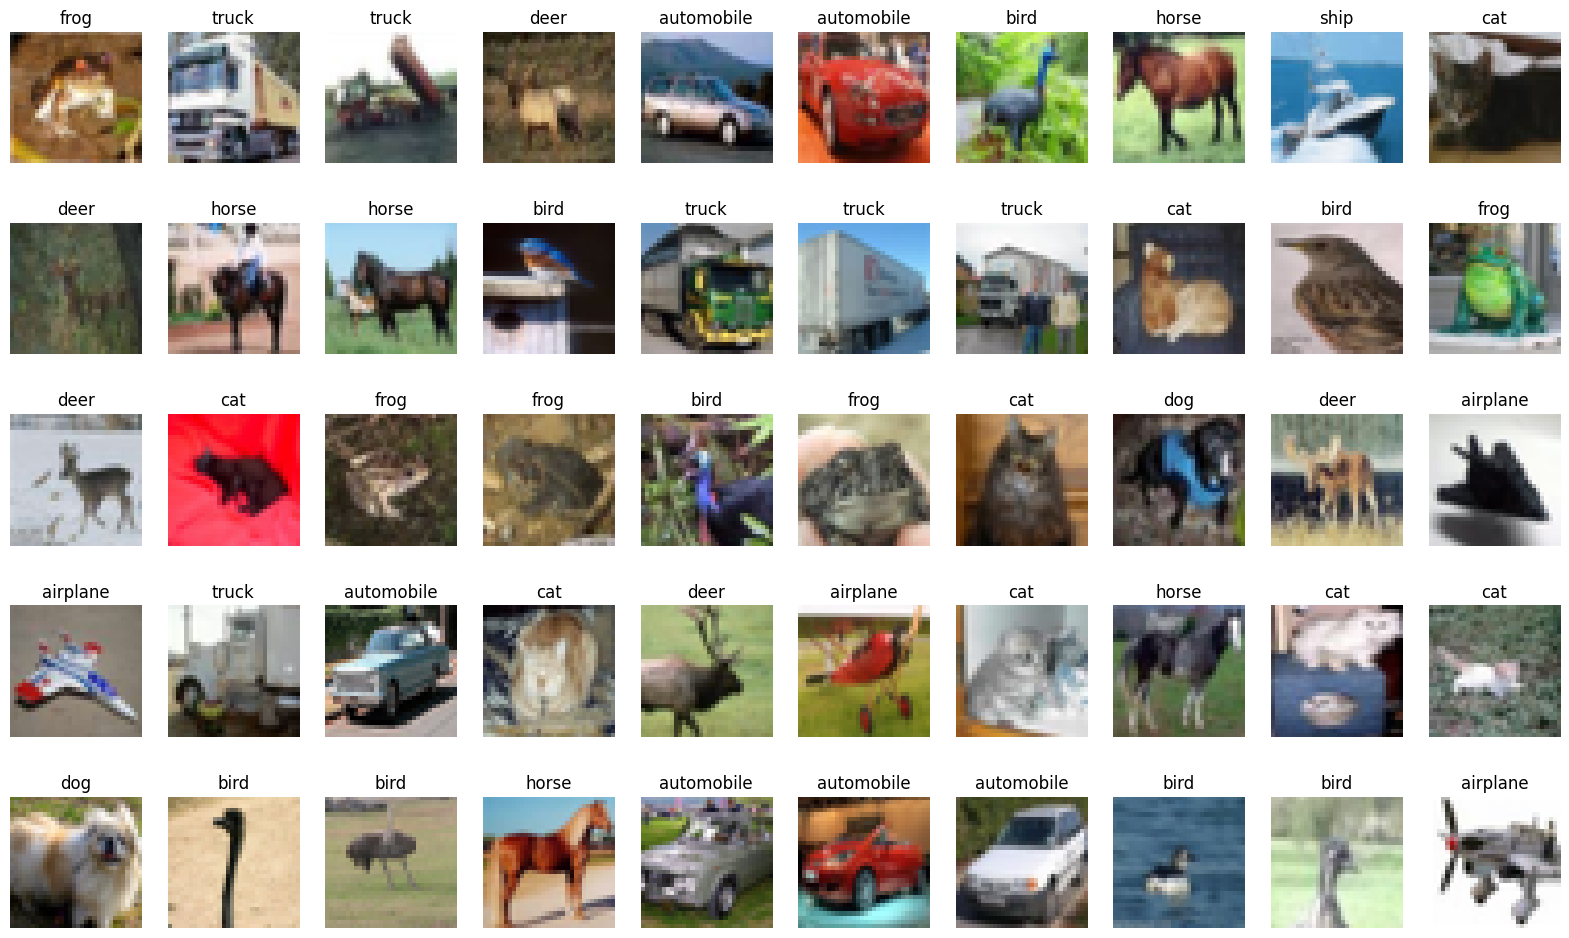

In [5]:
labels = ["airplane", "automobile", "bird", "cat", "deer",
          "dog", "frog", "horse", "ship", "truck"]
plt.figure(figsize=(20, 12))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.axis("off")
    plt.imshow(x_train[i])
    plt.title(labels[np.argmax(y_train[i])])
plt.show()

In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.3),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.5),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [8]:
batch_size=64
epochs = 20
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/20
782/782 [==============================] - 26s 13ms/step - loss: 1.6910 - accuracy: 0.4204
Epoch 2/20
782/782 [==============================] - 10s 13ms/step - loss: 1.1618 - accuracy: 0.5854
Epoch 3/20
782/782 [==============================] - 10s 13ms/step - loss: 0.9840 - accuracy: 0.6537
Epoch 4/20
782/782 [==============================] - 10s 13ms/step - loss: 0.8803 - accuracy: 0.6912
Epoch 5/20
782/782 [==============================] - 10s 12ms/step - loss: 0.8088 - accuracy: 0.7188
Epoch 6/20
782/782 [==============================] - 10s 13ms/step - loss: 0.7571 - accuracy: 0.7379
Epoch 7/20
782/782 [==============================] - 10s 13ms/step - loss: 0.7131 - accuracy: 0.7526
Epoch 8/20
782/782 [==============================] - 10s 12ms/step - loss: 0.6745 - accuracy: 0.7670
Epoch 9/20
782/782 [==============================] - 10s 12ms/step - loss: 0.6391 - accuracy: 0.7807
Epoch 10/20
782/782 [==============================] - 10s 13ms/step - loss: 0.619

In [ ]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=80)

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.4014 - accuracy: 0.8774


[0.4013729393482208, 0.8773999810218811]

In [11]:
model.save("model.h5")

In [12]:
!ls -lh

total 6.5M
-rw-r--r-- 1 root root 6.5M Jun  5 19:20 model.h5
drwxr-xr-x 1 root root 4.0K Jun  2 13:39 sample_data


In [13]:
type(model.layers)

list

In [14]:
len(model.layers)

23

In [15]:
type(model.layers[0])

keras.layers.convolutional.conv2d.Conv2D

In [16]:
#import pdb

def conv2d(mat, kernel):
    kn, km, ko = kernel.shape
    n, m, _ = mat.shape
    rn, rm = n - kn + 1, m - km + 1
    res = np.zeros((rn, rm))
    sumk = np.sum(kernel)
    for i in range(rn):
        for j in range(rm):
            rr = 0
            for p in range(kn):
                for q in range(km):
                    for r in range(ko):
                        #pdb.set_trace()
                        rr += mat[i, j, r] * kernel[p, q, r]
            res[i, j] = rr / sumk
    return res

In [17]:
def maxpool(mat, side, stride):
    n, m = mat.shape
    nn, mm = n // stride, m // stride
    res = np.zeros((nn, mm))
    for i in range(nn):
        for j in range(mm):
            res[i, j] = np.max(mat[i*side:(i+1)*side, j*side:(j+1)*side])
    return res

In [18]:
k = np.array(model.layers[0].kernel[:,:,:, 0])
print(k.shape)

(3, 3, 3)


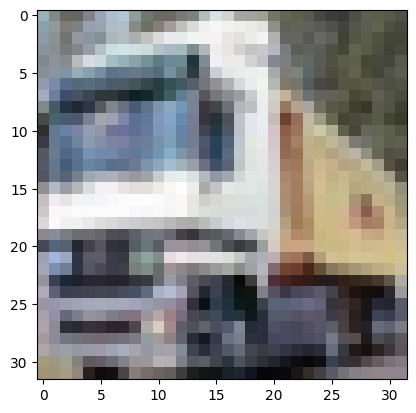

In [19]:
imidx=1
plt.imshow(x_train[imidx])

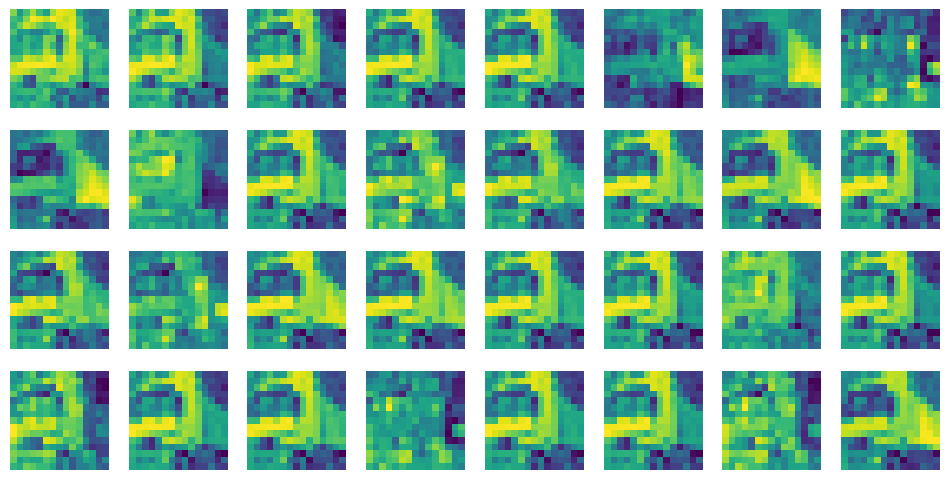

In [26]:
plt.figure(figsize=(12, 6))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.axis("off")
    kernel = np.array(model.layers[0].kernel[:,:,:, i])
    img = conv2d(x_train[imidx], kernel)
    img = maxpool(img, 2, 2)
    plt.imshow(img)
plt.show()

In [22]:
img.shape

(15, 15)

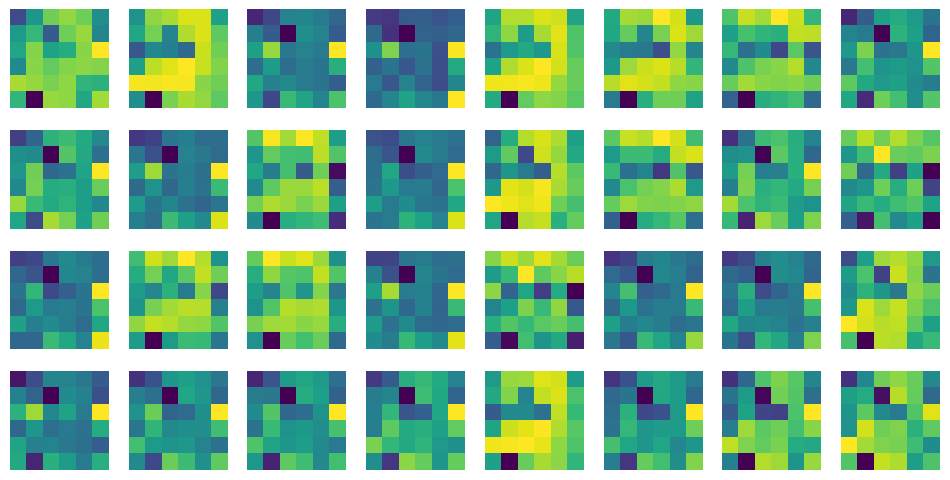

In [25]:
img = np.zeros((15, 15, 32))
for i in range(32):
    kernel = np.array(model.layers[0].kernel[:,:,:, i])
    imbase = conv2d(x_train[imidx], kernel)
    img[:,:,i] = maxpool(imbase, 2, 2)

plt.figure(figsize=(12, 6))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.axis("off")
    kernel = np.array(model.layers[2].kernel[:,:,:, i])
    imbase = conv2d(img, kernel)
    imbase = maxpool(imbase, 2, 2)
    plt.imshow(imbase)
plt.show()